## #3. Import the required packages with their customary aliases as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]


## #5. How many rows and columns are in gdp_df? What are the data types of each column?

In [6]:
print(gdp_df.shape)
gdp_df.info()

(7662, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## #6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df.rename(columns={'Country or Area' : 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)

In [9]:
gdp_df.drop(columns=['Value Footnotes'], inplace=True)
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


In [148]:
gdp_df.replace("Russia","Russian Federation", inplace = True)
gdp_df[gdp_df["Country"]=="Russian Federation"]

,Country,Year,GDP_Per_Capita
5800,Russian Federation,2022,27584.171875
5801,Russian Federation,2021,28193.837891
5802,Russian Federation,2020,26586.554688
5803,Russian Federation,2019,27254.574219
5804,Russian Federation,2018,26656.410156
5805,Russian Federation,2017,25926.443359
5806,Russian Federation,2016,25490.708984
5807,Russian Federation,2015,25488.095703
5808,Russian Federation,2014,26057.156250
5809,Russian Federation,2013,26332.396484


## #7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [11]:
# Questions to answer: What is the range of years in the dataset? List countries by count of unique years. List years by count of unique countries.
gdp_years = gdp_df.groupby("Country")
gdp_last = gdp_years.last()
gdp_min = gdp_last.sort_values(by="Year",ascending=False)
# All countries' first appearance in the dataset
# All countries' whose first appearance was after 1990
gdp_min[gdp_min["Year"]==1990]

,Year,GDP_Per_Capita
Country,,
Tajikistan,1990,3990.869035
Nepal,1990,1554.602043
United States,1990,40451.498405
Morocco,1990,4119.872070
Mozambique,1990,460.123697
...,...,...
Haiti,1990,3612.815105
Heavily indebted poor countries (HIPC),1990,1836.120378
High income,1990,31817.694273


In [12]:
gdp_count = gdp_df.groupby("Country")["Year"].count().reset_index().rename(columns={"Year":"Count"})
gdp_count[gdp_count["Count"]==33]

,Country,Count
1,Africa Eastern and Southern,33
2,Africa Western and Central,33
3,Albania,33
4,Algeria,33
5,Angola,33
...,...,...
236,Vanuatu,33
237,Viet Nam,33
239,World,33
240,Zambia,33


In [13]:
gdp_count[gdp_count["Count"]<33].reset_index(drop=True)

,Country,Count
0,Afghanistan,20
1,Aruba,32
2,Bhutan,32
3,Bosnia and Herzegovina,29
4,Cambodia,30
5,Cayman Islands,16
6,Croatia,28
7,CuraÃ§ao,22
8,Djibouti,10
9,Estonia,28


In [14]:
gdp_countries = gdp_df.groupby("Year")
gdp_observations = gdp_countries["Country"].count()
print(gdp_observations.to_string()) # Number of countries per year

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232


Countries missing years of data simply haven't been included in the dataset for as long.

## #8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

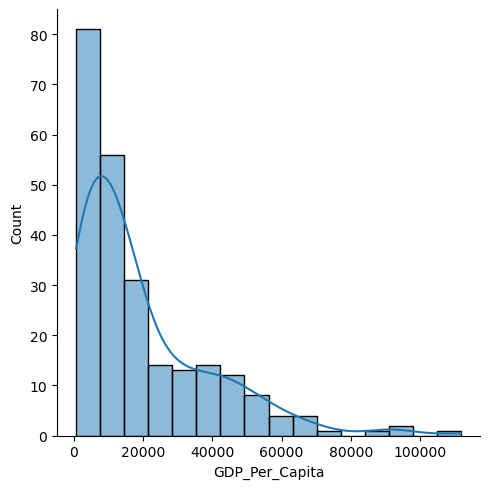

In [17]:
gdp_2020 = gdp_df[gdp_df["Year"]==2020]
sns.displot(data=gdp_2020["GDP_Per_Capita"], kde=True)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

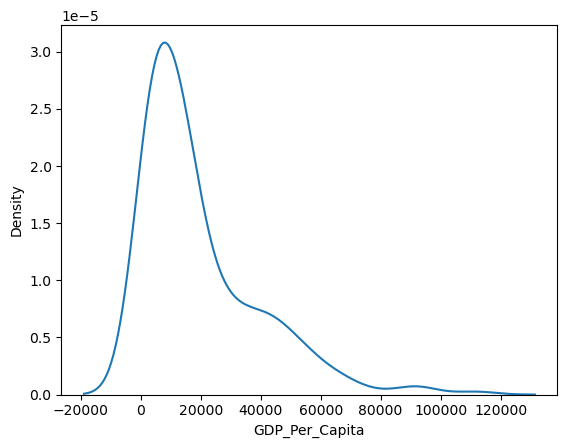

In [18]:
sns.kdeplot(gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita'>

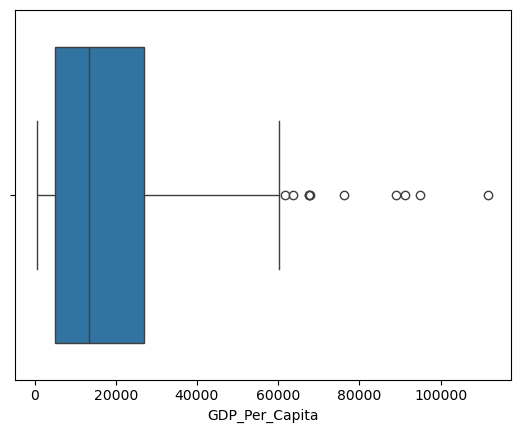

In [19]:
sns.boxplot(x=gdp_2020["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

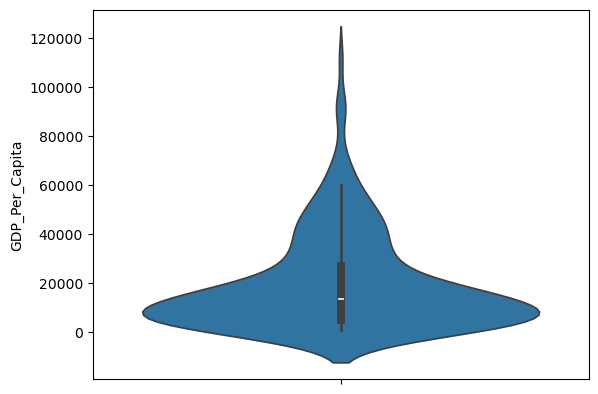

In [20]:
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])

The violin, histogram, and density graphs all display relatively the same information. The violin graph has a box plot in it, as well, but its is smaller and conveys less information. The box-and-whisker plot displays the quartiles as well as outliers. It objectively displays the most relevant information for this dataset.

## #9. What was the median GDP per capita value in 2020?

In [23]:
gdp_2020["GDP_Per_Capita"].median()

13357.997573370474

## #10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [25]:
decades = (1990,2000,2010,2020)
gdp_decades = gdp_df[gdp_df['Year'].isin(decades)]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

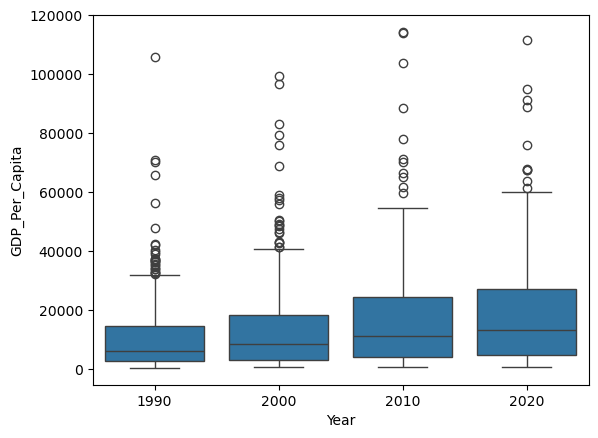

In [26]:
sns.boxplot(y=gdp_decades["GDP_Per_Capita"],x=gdp_decades["Year"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

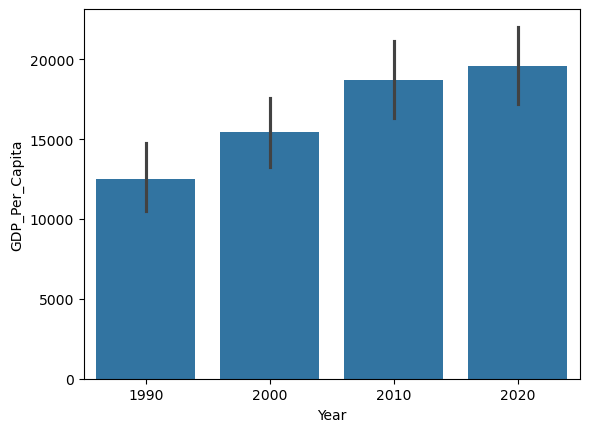

In [27]:
sns.barplot(x="Year",y="GDP_Per_Capita", data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

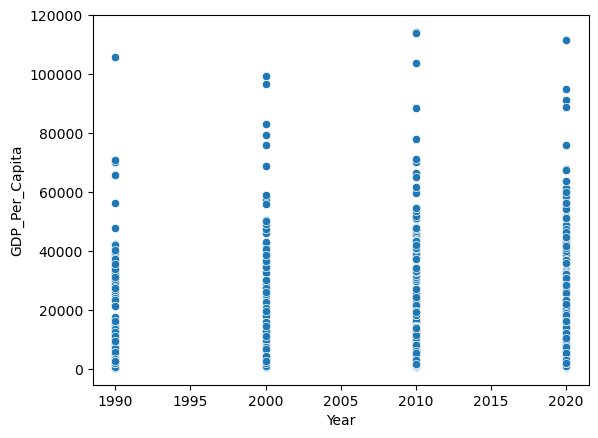

In [28]:
sns.scatterplot(y=gdp_decades["GDP_Per_Capita"],x=gdp_decades["Year"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

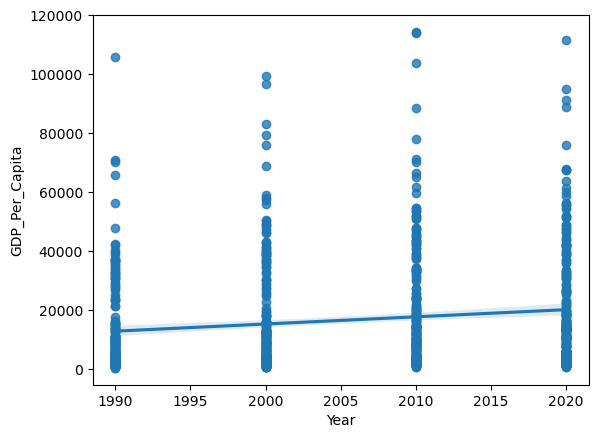

In [29]:
sns.regplot(y=gdp_decades["GDP_Per_Capita"],x=gdp_decades["Year"])

The general trend from these plots is that GDP per capita is increasing over time. Again, I find myself drawn to the amount of information included in box-and-whisker plots, although the scatterplot with trend line does give a better visual of sample size.

## #11. Which country was the first to have a GDP per capita greater than $100,000?

In [32]:
gdp_100k = gdp_df[gdp_df["GDP_Per_Capita"]>100000]
print(gdp_100k.nsmallest(1,"Year"))

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059


Answer: UAE was the first, with a GDP per capita of 105893.63

## #12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [35]:
gdp_2020.nlargest(1,"GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

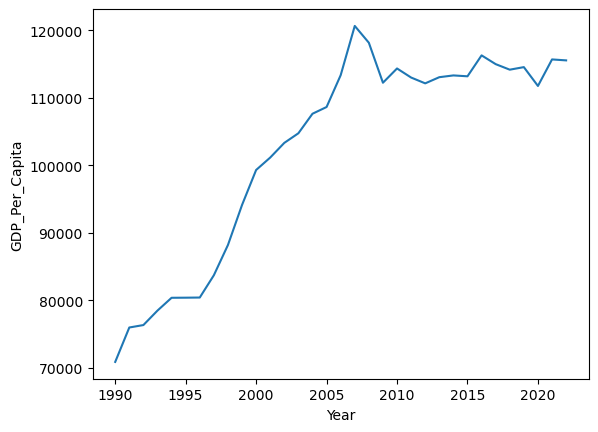

In [36]:
gdp_lux = gdp_df[gdp_df["Country"]=="Luxembourg"]
sns.lineplot(x=gdp_lux["Year"],y=gdp_lux["GDP_Per_Capita"])

## #13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [38]:
gdp_2020.sort_values(by="GDP_Per_Capita").head(1)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

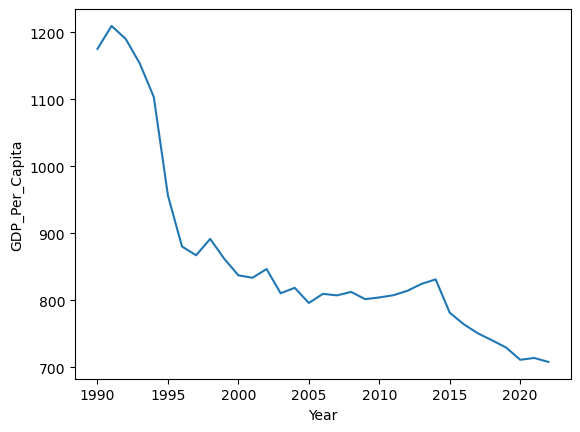

In [39]:
gdp_bur = gdp_df[gdp_df["Country"]=="Burundi"]
sns.lineplot(x=gdp_bur["Year"],y=gdp_bur["GDP_Per_Capita"])

In [40]:
gdp_1990 = gdp_df[gdp_df["Year"]==1990]

In [41]:
gdp_diff = gdp_2020.merge(gdp_1990,left_on="Country",right_on="Country",suffixes=("_2020","_1990"))
print(gdp_diff.shape)

(207, 5)


In [42]:
print(gdp_diff[gdp_diff["GDP_Per_Capita_2020"]<gdp_diff["GDP_Per_Capita_1990"]].shape)

(19, 5)


Comparing the number of rows in the merged list to the filtered list, it is true, in general, that countries in this dataset have a higher GDP in 2020 than in 1990, with 19 exceptions.

## #14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [45]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=6083)
print(internet_df)
internet_df.info()

     Country or Area  Year      Value Value Footnotes
0        Afghanistan  2019  17.600000               1
1        Afghanistan  2018  16.800000               2
2        Afghanistan  2017  13.500000               3
3        Afghanistan  2016  11.000000               4
4        Afghanistan  2015   8.260000               4
...              ...   ...        ...             ...
6078        Zimbabwe  1997   0.033080             NaN
6079        Zimbabwe  1996   0.016790             NaN
6080        Zimbabwe  1995   0.007684             NaN
6081        Zimbabwe  1994   0.001739             NaN
6082        Zimbabwe  1990   0.000000             NaN

[6083 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null  

## 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [47]:
internet_df.drop(columns="Value Footnotes", inplace=True)

In [48]:
internet_df.rename(columns={"Country or Area":"Country","Value":"Inter_Users_Pct"},inplace=True)
print(internet_df)

          Country  Year  Inter_Users_Pct
0     Afghanistan  2019        17.600000
1     Afghanistan  2018        16.800000
2     Afghanistan  2017        13.500000
3     Afghanistan  2016        11.000000
4     Afghanistan  2015         8.260000
...           ...   ...              ...
6078     Zimbabwe  1997         0.033080
6079     Zimbabwe  1996         0.016790
6080     Zimbabwe  1995         0.007684
6081     Zimbabwe  1994         0.001739
6082     Zimbabwe  1990         0.000000

[6083 rows x 3 columns]


## #16. Look at the number of observations in this dataset per year. What do you notice?

In [50]:
internet_years = internet_df.groupby("Year")["Country"].count()
print(internet_years.to_string())

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11


Unlike the last dataset, internet_df has values that leave the dataset, evidenced by the counts going down between years. It appears that the 2023 dataset ends abruptly, explaining the 11 entries.

## #17. What is the first year to have a non-zero internet users percentage value?

In [53]:
print(internet_df[internet_df["Inter_Users_Pct"]>0].sort_values(by="Year").reset_index(drop=True).head(1))

   Country  Year  Inter_Users_Pct
0  Denmark  1990         0.097277


1990, the first year of the dataset

## #18. How does the distribution of internet users percent differ for 2000 and 2014?

In [56]:
internet_2000 = internet_df[internet_df["Year"]==2000]
internet_2014 = internet_df[internet_df["Year"]==2014]
internet_diff = internet_2000.merge(internet_2014,left_on="Country",right_on="Country",suffixes=("_2000","_2014")).drop(columns={"Year_2000","Year_2014"})
print(internet_diff)

                 Country  Inter_Users_Pct_2000  Inter_Users_Pct_2014
0                Albania              0.114097               54.3000
1                Algeria              0.491706               29.5000
2                Andorra             10.538800               86.1000
3                 Angola              0.105046               21.3623
4               Anguilla             22.405400               70.3900
..                   ...                   ...                   ...
190             Viet Nam              0.254248               41.0000
191  Virgin Islands (US)             13.815100               50.0700
192                Yemen              0.082500               22.5500
193               Zambia              0.191072                6.5000
194             Zimbabwe              0.401434               16.3647

[195 rows x 3 columns]


<Axes: xlabel='Year', ylabel='Inter_Users_Pct'>

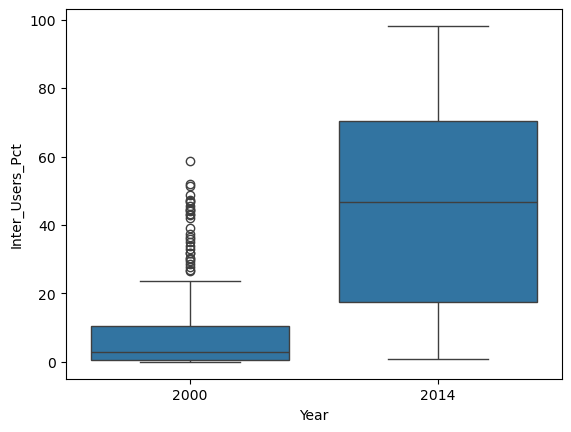

In [57]:
internet_dist = internet_df[internet_df["Year"].isin([2000,2014])]
sns.boxplot(x=internet_dist["Year"],y=internet_dist["Inter_Users_Pct"])

By and large, distribution of Inter_Users_Pct has increased dramatically from 2000 to 2014. 

## #19. For how many countries was the percentage of internet users below 5% in 2014?

In [60]:
internet_2014 = internet_df[internet_df["Year"]==2014]
internet_5pct = internet_2014[internet_2014["Inter_Users_Pct"]<5]
print(internet_5pct["Country"].count())

10


10 Countries.

## #20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [152]:
gdp_and_internet_use = gdp_df.merge(internet_df, how="outer",on=["Country","Year"])
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Inter_Users_Pct
0     Afghanistan  1990             NaN         0.000000
1     Afghanistan  2001             NaN         0.004723
2     Afghanistan  2002     1280.463171         0.004561
3     Afghanistan  2003     1292.333437         0.087891
4     Afghanistan  2004     1260.060581         0.105809
...           ...   ...             ...              ...
9075     Zimbabwe  2018     2399.621551        25.000000
9076     Zimbabwe  2019     2203.396810        26.588300
9077     Zimbabwe  2020     1990.319419        29.298600
9078     Zimbabwe  2021     2115.144555        32.461600
9079     Zimbabwe  2022     2143.237574        32.561500

[9080 rows x 4 columns]


## #21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

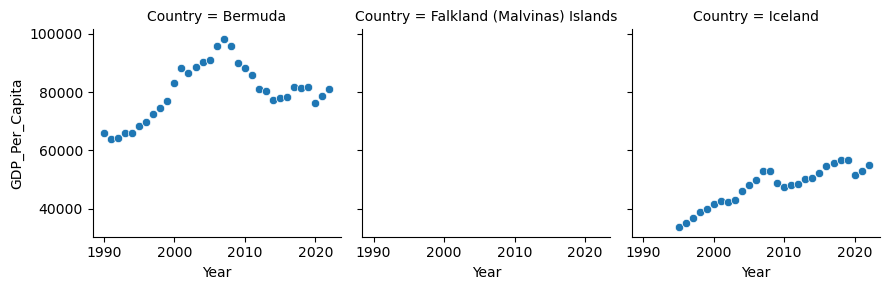

In [65]:
df_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]
top3_df = df_2014.nlargest(3,"Inter_Users_Pct")
sns.FacetGrid(gdp_and_internet_use[gdp_and_internet_use["Country"].isin(top3_df["Country"])], col="Country").map(sns.scatterplot, "Year", "GDP_Per_Capita")

In [66]:
top3_df

,Country,Year,GDP_Per_Capita,Inter_Users_Pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


The Falkland Islands is not included in the gdp_df dataframe. Comparing Bermuda and Iceland's graphs, there appears to be little to no correlation between GDP and Internet Use Percentage.

## #22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [69]:
# I already did this in the last question, but I'll do it again for practice's sake.
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Inter_Users_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


## #23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Inter_Users_Pct', ylabel='GDP_Per_Capita'>

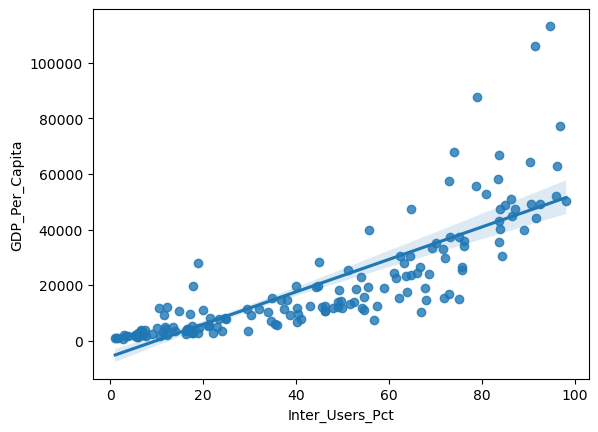

In [71]:
sns.regplot(x=gdp_and_internet_use_2014["Inter_Users_Pct"],y=gdp_and_internet_use_2014["GDP_Per_Capita"])

In [72]:
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014["Inter_Users_Pct"]<20].nlargest(10,"GDP_Per_Capita"))

                Country  Year  GDP_Per_Capita  Inter_Users_Pct
2461  Equatorial Guinea  2014    28106.198389          18.8600
4839              Libya  2014    19569.900489          17.7600
8439       Turkmenistan  2014    11989.653764          12.2000
7660          Sri Lanka  2014    11768.020392          10.5000
5653           Mongolia  2014    11107.988979          19.9424
5818            Namibia  2014    10554.564755          14.8400
3886          Indonesia  2014     9759.025207          17.1432
3982               Iraq  2014     9194.864078          11.6453
6063          Nicaragua  2014     5385.527436          17.6000
3853              India  2014     5071.047084          13.5000


"Equatorial Guinea has the highest gross national income (GNI) per capita of any African country, 83 times larger than the GNI per capita of Burundi, the poorest country." -'50 Things You Didn't Know About Africa', World Bank

The outlier above, around the 20% Inter_Users_Pct mark, belongs to Equatorial Guinea. After having oil discovered in 1996, the GDP of the country skyrocketed. However, the wealth inequality is staggering. So while its GDP per capita is leagues higher than its neighbors, its percentage of citizens with internet access is still <20%.

Aside from this, it's plain to see the positive correlation between GDP per capita and internet access, no doubt due to developed countries having the infrastructure to support wide access to the internet.

In [74]:
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014["Inter_Users_Pct"]>90].nlargest(10,"GDP_Per_Capita"))

                   Country  Year  GDP_Per_Capita  Inter_Users_Pct
5023            Luxembourg  2014   113313.578898          94.6702
6780                 Qatar  2014   106141.326189          91.4900
794                Bermuda  2014    77361.104881          96.8000
8647  United Arab Emirates  2014    64334.091552          90.4000
6243                Norway  2014    62838.515727          96.3005
2100               Denmark  2014    52048.335493          95.9935
3820               Iceland  2014    50450.741612          98.1580
7998                Sweden  2014    49258.996164          92.5236
562                Bahrain  2014    49117.988448          90.5031
8680        United Kingdom  2014    43990.996722          91.6133


## #24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [76]:
gdp_per_capita_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]
gdp_per_capita_2014.insert(4,"GDP_group", pd.qcut(gdp_per_capita_2014["GDP_Per_Capita"],3,labels=["Low","Medium","High"]))
gdp_per_capita_2014

,Country,Year,GDP_Per_Capita,Inter_Users_Pct,GDP_group
14,Afghanistan,2014,2144.449634,7.0000,Low
46,Africa Eastern and Southern,2014,3642.875373,NaN,Low
79,Africa Western and Central,2014,4146.994622,NaN,Low
112,Albania,2014,11586.817446,54.3000,Medium
145,Algeria,2014,11561.259795,29.5000,Medium
...,...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN,Low
9011,World,2014,15120.730322,NaN,Medium
9039,Yemen,2014,NaN,22.5500,NaN
9070,Zambia,2014,3375.941270,6.5000,Low


## #25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

<Axes: xlabel='GDP_group', ylabel='Inter_Users_Pct'>

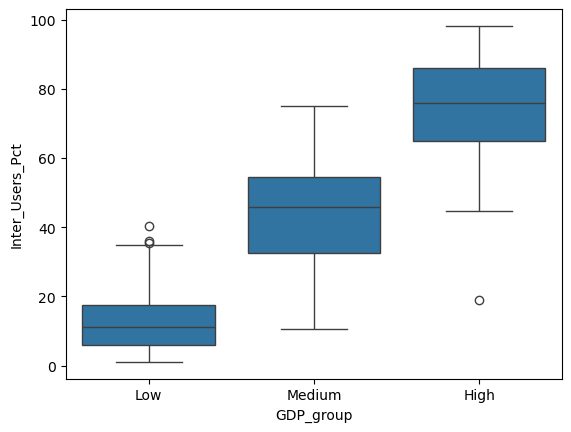

In [78]:
sns.boxplot(gdp_per_capita_2014, x="GDP_group", y="Inter_Users_Pct")

The median Inter_Users_Pct for the three groups seems to scale directly with GDP_Per_Capita.

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [81]:
greenhouse_df = pd.read_csv('../data/greenhouse_emission.csv')
greenhouse_df.rename(columns={"Country or Area" : "Country", "Value":"Greenhouse_Emissions"},inplace=True)
greenhouse_df

,Country,Year,Greenhouse_Emissions
0,Australia,2020,4.003335e+05
1,Australia,2019,4.167619e+05
2,Australia,2018,4.162838e+05
3,Australia,2017,4.143583e+05
4,Australia,2016,4.112643e+05
...,...,...,...
1370,United States,1994,5.364279e+06
1371,United States,1993,5.272851e+06
1372,United States,1992,5.174228e+06
1373,United States,1991,5.062957e+06


In [154]:
gdp_internet_greenhouse = gdp_and_internet_use.merge(greenhouse_df, how="outer",on=["Country","Year"])
gdp_internet_greenhouse

,Country,Year,GDP_Per_Capita,Inter_Users_Pct,Greenhouse_Emissions
0,Afghanistan,1990,NaN,0.000000,NaN
1,Afghanistan,2001,NaN,0.004723,NaN
2,Afghanistan,2002,1280.463171,0.004561,NaN
3,Afghanistan,2003,1292.333437,0.087891,NaN
4,Afghanistan,2004,1260.060581,0.105809,NaN
...,...,...,...,...,...
9112,Zimbabwe,2018,2399.621551,25.000000,NaN
9113,Zimbabwe,2019,2203.396810,26.588300,NaN
9114,Zimbabwe,2020,1990.319419,29.298600,NaN
9115,Zimbabwe,2021,2115.144555,32.461600,NaN


In [83]:
gdp_internet_greenhouse.nlargest(10,"Greenhouse_Emissions")

,Country,Year,GDP_Per_Capita,Inter_Users_Pct,Greenhouse_Emissions
8742,United States,2005,54331.658336,67.9681,6132183.270
8744,United States,2007,55885.646174,75.0000,6130122.760
8741,United States,2004,52989.030694,64.7583,6112654.584
8743,United States,2006,55307.719149,68.9312,6052686.215
8740,United States,2003,51497.734688,61.6971,6010145.463
8737,United States,2000,50169.856362,43.0792,6010135.928
8739,United States,2002,50529.349582,58.7854,5946308.145
8745,United States,2008,55427.178273,74.0000,5915118.465
8738,United States,2001,50149.828692,49.0808,5907739.935
8736,United States,1999,48743.882837,35.8487,5803917.834


<Axes: xlabel='Year', ylabel='Greenhouse_Emissions'>

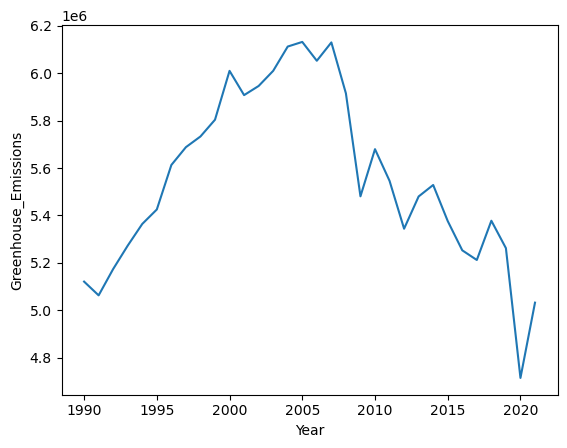

In [84]:
freedom_df = gdp_internet_greenhouse[gdp_internet_greenhouse["Country"]=="United States"]
sns.lineplot(freedom_df,x="Year",y="Greenhouse_Emissions")

In [85]:
freedom_df.insert(
    5,"GDP_1e3",freedom_df["GDP_Per_Capita"].div(1000))
freedom_df.insert(
    6,"Greenhouse_1e5",freedom_df["Greenhouse_Emissions"].div(100000))
freedom_df

,Country,Year,GDP_Per_Capita,Inter_Users_Pct,Greenhouse_Emissions,GDP_1e3,Greenhouse_1e5
8727,United States,1990,40451.498405,0.784729,5120957.207,40.451498,51.209572
8728,United States,1991,39871.342964,1.163190,5062956.718,39.871343,50.629567
8729,United States,1992,40707.290631,1.724200,5174227.507,40.707291,51.742275
8730,United States,1993,41279.516502,2.271670,5272850.808,41.279517,52.728508
8731,United States,1994,42419.195365,4.862780,5364279.285,42.419195,53.642793
8732,United States,1995,43042.213822,9.237090,5425259.696,43.042214,54.252597
8733,United States,1996,44149.371129,16.419400,5612982.752,44.149371,56.129828
8734,United States,1997,45560.920145,21.616400,5688142.511,45.560920,56.881425
8735,United States,1998,47050.995083,30.093200,5733280.550,47.050995,57.332805
8736,United States,1999,48743.882837,35.848700,5803917.834,48.743883,58.039178


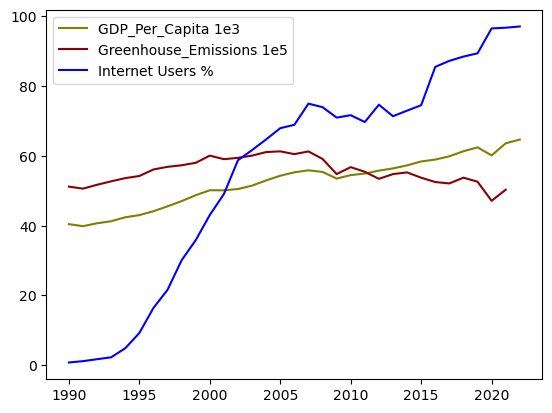

In [86]:
plt.plot(
    "Year","GDP_1e3",data=freedom_df,
    color="olive",
    label="GDP_Per_Capita 1e3"
    )
plt.plot(
    "Year","Greenhouse_1e5",data=freedom_df,
    color="darkred",
    label="Greenhouse_Emissions 1e5"
    )
plt.plot(
    "Year","Inter_Users_Pct",data=freedom_df,
    color="blue",
    label="Internet Users %"
)
plt.legend()
plt.show()